In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# rubbish_data  = pd.ExcelFile("ai_rubbish.xlsx")
# rubbish_data.head()

rubbish_data =  pd.read_csv("ai_rubbish.csv")
# rubbish_data.info()
rubbish_data.head(100)


/var/folders/g1/70932d0n6vvcb4_c7b1vdf_r0000gn/T/ipykernel_77328/1674400800.py:8: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  rubbish_data =  pd.read_csv("ai_rubbish.csv")


,SurveyId,SurveyDate,SurveyStatus,SurveyVerified,Region,Country,SurveyArea,SurveyAreaType,SurveyAreaLatitudeStart,SurveyAreaLongitudeStart,...,AuditHours,TotalAuditHours,NumberOfAuditors,LitterCategory,LitterItem,LitterItemCode,Count,Weight,WeightConfidence,Grade
0,36,11/7/2018,Official,Verified,Wellington,New Zealand,Island Bay - The Surf Club Rooms,Beach,-41.34342,174.77398,...,0.5,6.0,12,Plastic,Bottle caps & lids,PL01,3.0,57.0,High,NaN
1,36,11/7/2018,Official,Verified,Wellington,New Zealand,Island Bay - The Surf Club Rooms,Beach,-41.34342,174.77398,...,0.5,6.0,12,Plastic,Bottle neck rings,PL01.01,9.0,2.0,High,NaN
2,36,11/7/2018,Official,Verified,Wellington,New Zealand,Island Bay - The Surf Club Rooms,Beach,-41.34342,174.77398,...,0.5,6.0,12,Plastic,Bottle seals & tabs,PL01.02,0.0,0.0,NaN,0
3,36,11/7/2018,Official,Verified,Wellington,New Zealand,Island Bay - The Surf Club Rooms,Beach,-41.34342,174.77398,...,0.5,6.0,12,Plastic,Bottles <= 2 L,PL02,0.0,0.0,NaN,0
4,36,11/7/2018,Official,Verified,Wellington,New Zealand,Island Bay - The Surf Club Rooms,Beach,-41.34342,174.77398,...,0.5,6.0,12,Plastic,"Bottles, drums, jerrycans & buckets > 2 L",PL03,0.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,36,11/7/2018,Official,Verified,Wellington,New Zealand,Island Bay - The Surf Club Rooms,Beach,-41.34342,174.77398,...,0.5,6.0,12,Rubber,Construction & Automotive,RB08.03,0.0,0.0,NaN,0
96,36,11/7/2018,Official,Verified,Wellington,New Zealand,Island Bay - The Surf Club Rooms,Beach,-41.34342,174.77398,...,0.5,6.0,12,Wood,Corks,WD01,0.0,0.0,NaN,0
97,36,11/7/2018,Official,Verified,Wellington,New Zealand,Island Bay - The Surf Club Rooms,Beach,-41.34342,174.77398,...,0.5,6.0,12,Wood,Fishing traps and pots,WD02,0.0,0.0,NaN,0
98,36,11/7/2018,Official,Verified,Wellington,New Zealand,Island Bay - The Surf Club Rooms,Beach,-41.34342,174.77398,...,0.5,6.0,12,Wood,Wooden utensils,WD03,0.0,0.0,NaN,0


In [56]:
# Group by 'Region' and 'SurveyDate' and sum the rubbish count
rubbish_by_region_date = rubbish_data.groupby(['Region', 'SurveyDate'])['Count'].sum().reset_index(name='Rubbish_Count')
# Display the first few rows of the resulting DataFrame
rubbish_by_region_date
# Outputs to csv
# rubbish_by_region_date.to_csv('rubbish_by_region_date.csv', index=False)


,Region,SurveyDate,Rubbish_Count
0,A'ana,12/2/2023,269.0
1,A'ana,3/16/2024,359.0
2,A'ana,6/27/2023,137.0
3,Atua,10/1/2022,727.0
4,Atua,12/1/2023,116.0
...,...,...,...
1873,West Coast,9/15/2021,0.0
1874,West Coast,9/2/2019,12.0
1875,Western,10/19/2022,278.0
1876,Western,3/17/2023,278.0


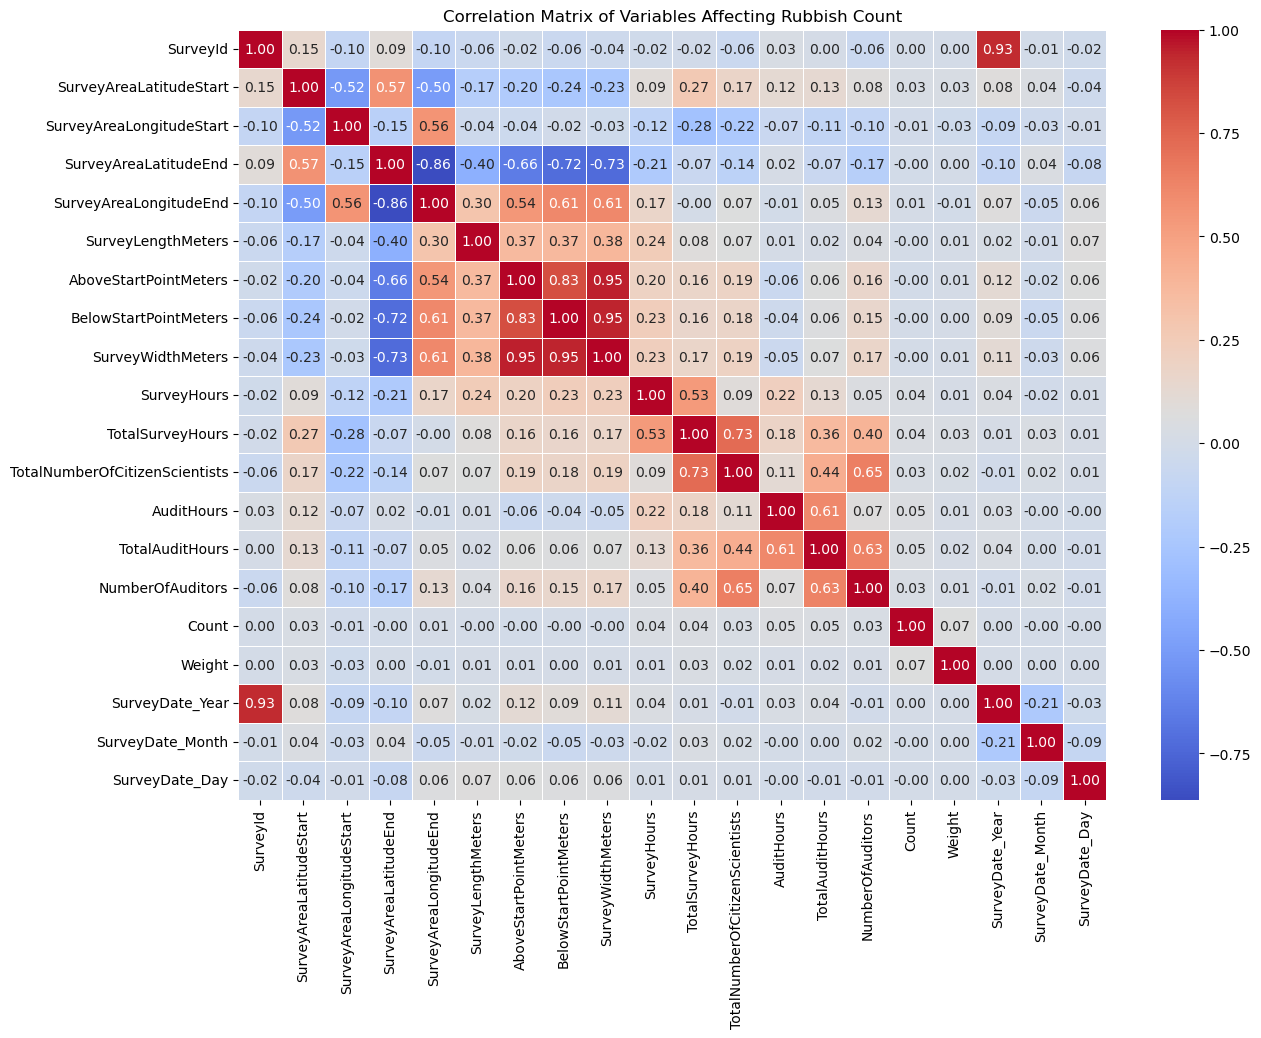

In [39]:

rubbish_data =  pd.read_csv("ai_rubbish.csv")

# Assuming rubbish_data is your DataFrame

# Convert 'SurveyDate' and other date columns to datetime format and extract numerical features
rubbish_data['SurveyDate'] = pd.to_datetime(rubbish_data['SurveyDate'], errors='coerce')  # Convert to datetime
rubbish_data['SurveyDate_Year'] = rubbish_data['SurveyDate'].dt.year
rubbish_data['SurveyDate_Month'] = rubbish_data['SurveyDate'].dt.month
rubbish_data['SurveyDate_Day'] = rubbish_data['SurveyDate'].dt.day

# Drop the original 'SurveyDate' column if no longer needed
rubbish_data.drop(columns=['SurveyDate'], inplace=True)

# Convert categorical columns to numeric using one-hot encoding
categorical_cols = ['SurveyStatus', 'SurveyVerified', 'Region', 'Country', 'SurveyArea', 
                     'SurveyAreaType', 'SurveyAreaLocationType', 'SurveySubstratumType', 
                     'LitterCategory', 'LitterItem', 'LitterItemCode', 'Grade']

# Apply one-hot encoding to categorical columns
rubbish_data_encoded = pd.get_dummies(rubbish_data, columns=categorical_cols, drop_first=True)

# Ensure all columns are numeric and drop any non-numeric columns
rubbish_data_numeric = rubbish_data_encoded.select_dtypes(include=[float, int])

# Handle missing values by filling with 0
rubbish_data_numeric.fillna(0, inplace=True)

# Calculate the correlation matrix
correlation_matrix = rubbish_data_numeric.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Variables Affecting Rubbish Count')
plt.show()
